# Importação das bibliotecas e da base de dados

Importação das bibliotecas iniciais

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import tensorflow as tf
import sklearn as sk

Importação da base de dados

In [ ]:
# Importação da base de dados
df = pd.read_csv('/content/rh_data.csv')

# Preparação e limpeza da base de dados

Verificação dos tipos de dados

In [ ]:
# Verificação dos tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

**NumCompaniesWorked** e **TotalWorkingYears** estão como float e deveriam ser inteiros

Verificando como está a base de dados

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Verificando tamanho da base de dados

In [ ]:
# Verificação do tamanho da base
df.shape

(4410, 24)

Verificando valores duplicados

In [ ]:
# Quantidade total de linhas duplicadas
df.duplicated().sum()

np.int64(0)

Verificando as categorias das variáveis

In [ ]:
# Identificar todas as colunas de texto (object)
colunas_texto = df.select_dtypes(include='object').columns
print("Colunas de texto:", list(colunas_texto))

# Para cada coluna de texto, mostrar os valores únicos
for col in colunas_texto:
    print(f"\nValores únicos de {col}:")
    print(df[col].unique())

Colunas de texto: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']

Valores únicos de Attrition:
['No' 'Yes']

Valores únicos de BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Valores únicos de Department:
['Sales' 'Research & Development' 'Human Resources']

Valores únicos de EducationField:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Valores únicos de Gender:
['Female' 'Male']

Valores únicos de JobRole:
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

Valores únicos de MaritalStatus:
['Married' 'Single' 'Divorced']

Valores únicos de Over18:
['Y']


Verificando valores únicos das variáveis

In [ ]:
# Verificação de quantos valores únicos cada coluna possui
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeID,4410
Gender,2


Remoção das colunas que não agregam no modelo

In [ ]:
# Removendo colunas que não agregam no modelo
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'Gender'], inplace=True)

# Conferindo as colunas restantes
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Verificação de quais as variáveis que apresentam apenas um valor constante. Essas serão desconsideradas por não agregarem na análise final e no modelo.

Gender foi removida, pois pode ser discriminatória na avaliação do modelo.

Confirmando como ficou o tamanho da base após as exclusões

In [ ]:
df.shape

(4410, 20)

Verificação dos valores nulos

In [ ]:
# Verificação de valores nulos
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeID,0
JobLevel,0
JobRole,0


- **NumCompaniesWorked**: 19 nulos em 4410 registros (0,43%)
- **TotalWorkingYears**: 9 nulos em 4410 registros (0,20%)

Como o percentual de nulos é muito pequeno, foi optado por preencher com a mediana, evitando distorcer a modelagem e perder registros importantes

Aplicando decisão sobre os valores nulos encontrados

In [ ]:
# Preenchendo os valores nulos com a mediana das colunas
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median(), inplace=True)
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].median(), inplace=True)

/tmp/ipython-input-836938475.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median(), inplace=True)
/tmp/ipython-input-836938475.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

Confirmando como a base ficou após tratativa dos nulos

In [ ]:
# Verificando novamente os nulos
print(df.isnull().sum())

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


Alteração do tipo de dado

In [ ]:
# Alterando dados - convertendo float para int
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype(int)
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype(int)

Como não temos mais nulos, foi realizado a conversão das duas colunas que estavam como float para int

Padronização das variáveis categóricas

In [ ]:
# Ajustando as variáveis categóricas, padronizando o que for necessário
categorical_cols = ['Attrition', 'BusinessTravel', 'Department',
                    'EducationField', 'JobRole', 'MaritalStatus']

for col in categorical_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].str.strip()

Criação de nova variável para AGE

In [ ]:
# Criando a nova variável categórica para a idade com as novas faixas
bins = [18, 30, 45, 55, float('inf')]
labels = ['Jovem adulto', 'Adulto', 'Adulto meia-idade', 'Senior']

df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Exibindo as primeiras linhas com a nova coluna e a contagem de valores
print(df[['Age', 'Age_Category']].head())
print("\nContagem de valores por categoria de idade:")
print(df['Age_Category'].value_counts())

   Age       Age_Category
0   51  Adulto meia-idade
1   31             Adulto
2   32             Adulto
3   38             Adulto
4   32             Adulto

Contagem de valores por categoria de idade:
Age_Category
Adulto               2433
Jovem adulto         1158
Adulto meia-idade     678
Senior                141
Name: count, dtype: int64


# Análise exploratória (EDA)

Verificando estatísticas descritivas

In [ ]:
# Exibindo estatísticas descritivas
display(df.describe())

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2205.500000,2.063946,65029.312925,2.691837,15.209524,0.793878,11.277324,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,1273.201673,1.106689,47068.888559,2.493912,3.659108,0.851883,7.774490,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4410.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


Bloxplot para enxergar os outliers

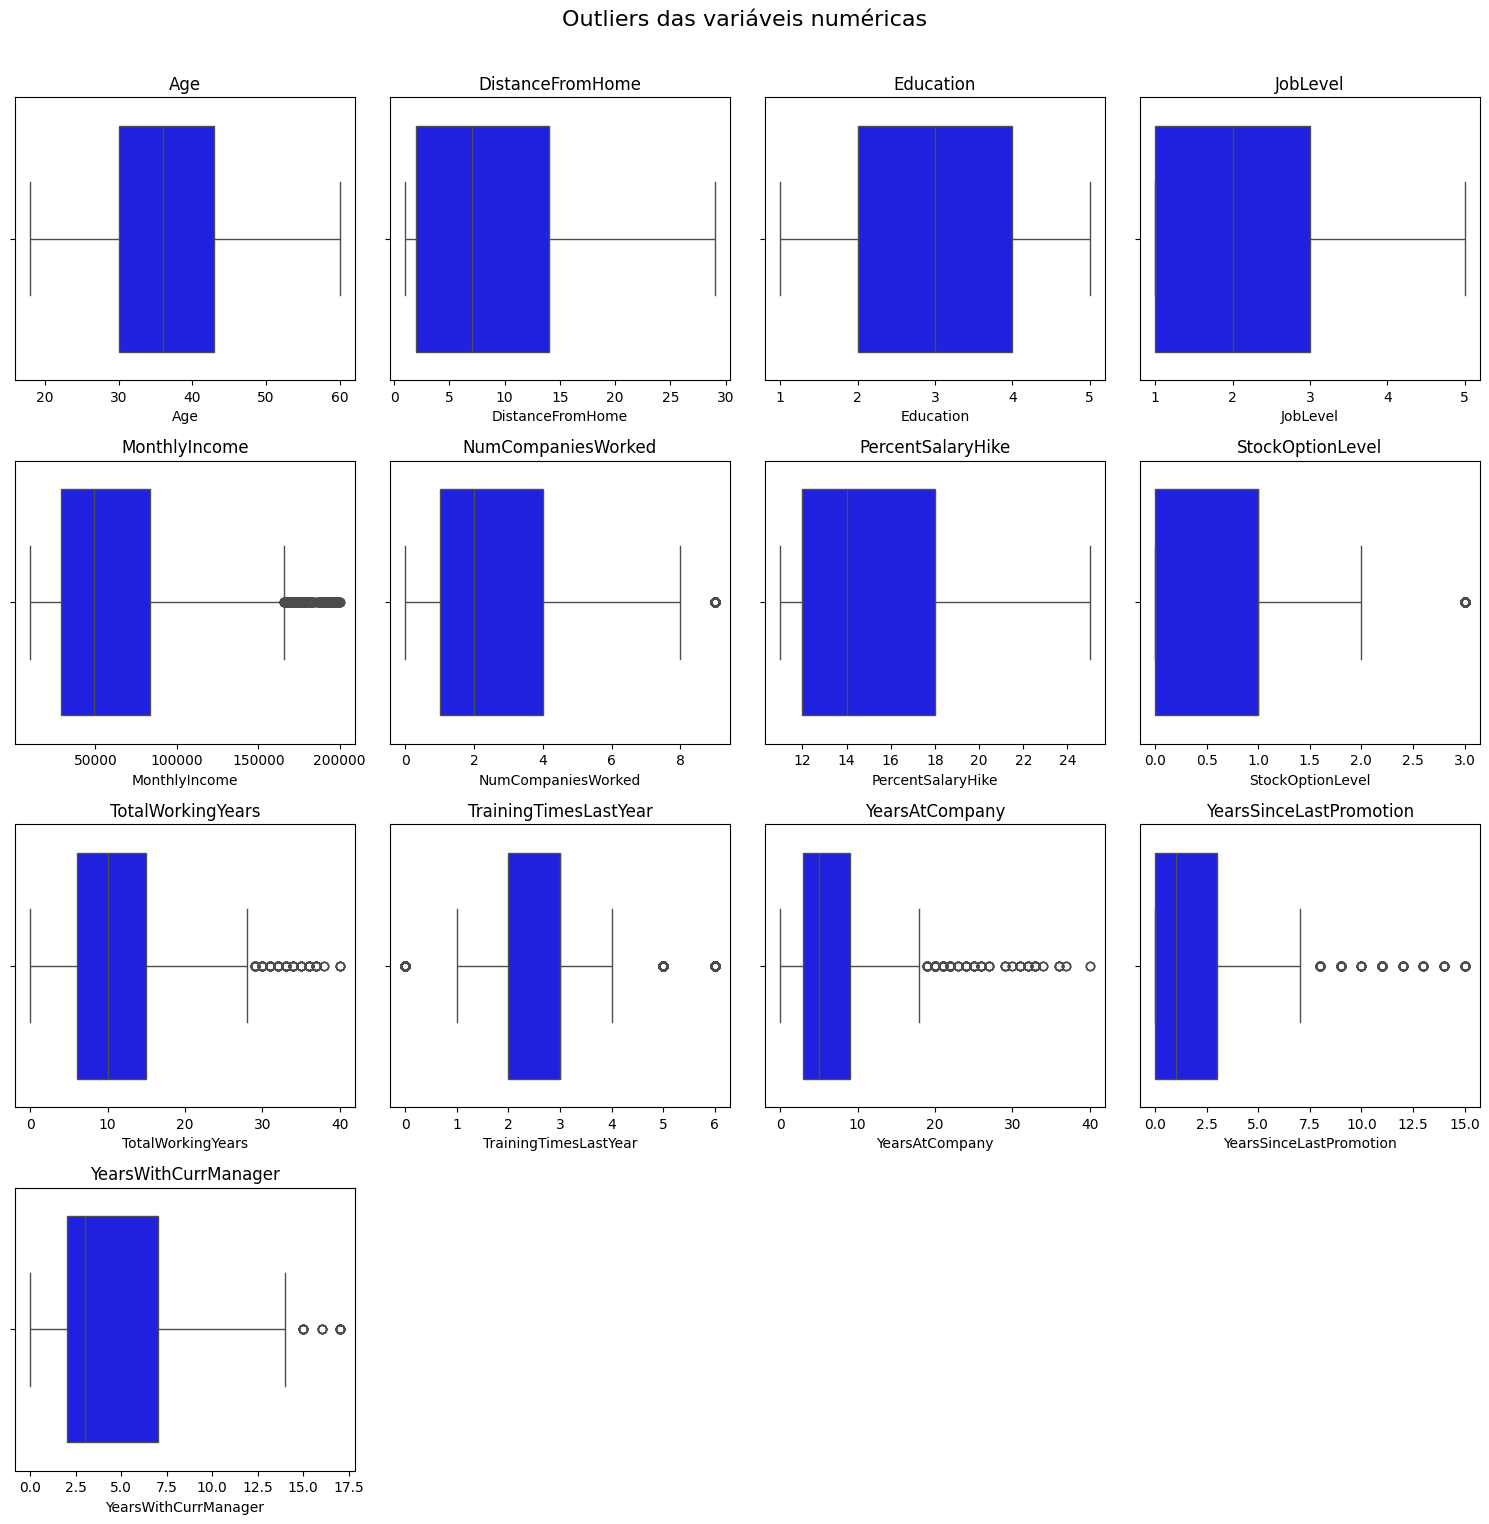

In [ ]:
# Selecionar apenas colunas numéricas, excluindo 'EmployeeID'
num_cols = df.select_dtypes(include=np.number).columns.drop('EmployeeID')

# Definir o número de linhas e colunas para os subplots
n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

# Definir o tamanho da figura
plt.figure(figsize=(15, n_rows * 4))
plt.suptitle('Outliers das variáveis numéricas', fontsize=16)

# Loop para criar os subplots dos boxplots
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], color='blue')
    plt.title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

Os outliers identificados foram mantidos na base de dados, pois refletem padrões comuns em um contexto de RH.

A maioria dos funcionários está concentrada em cargos, salários e níveis de entrada, apresentando perfis mais juniores. Já os valores extremos observados no **MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion e YearsWithCurrManager** correspondem a profissionais de maior senioridade - um padrão esperado que se reflete em salário, promoções e tempo de empresa.

Para **TrainingTimesLastYear**, a concentração está em 2 a 3 treinamentos anuais, mas não é incomum haver funcionários que realizem mais ou menos treinamentos ao longo do ano.

Matriz de correlação entre as variáveis numéricas

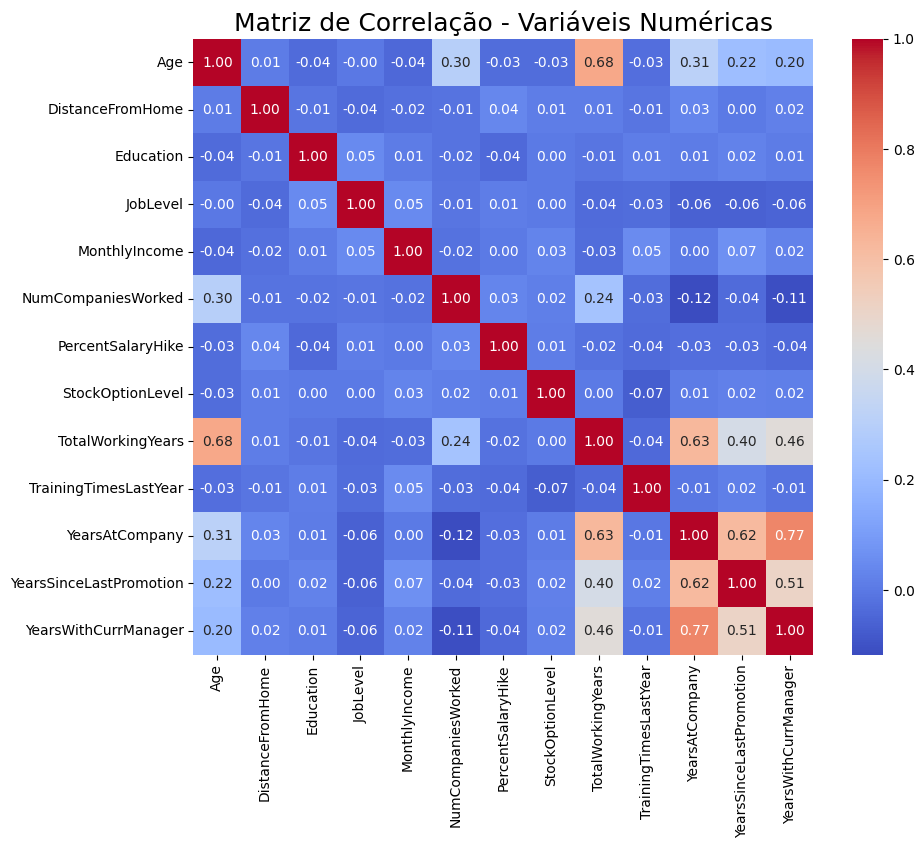

In [ ]:
# Matriz de correlação entre as variáveis numéricas

# Selecionar apenas colunas numéricas, excluindo 'EmployeeID'
num_cols_for_corr = df.select_dtypes(include=np.number).columns.drop(['EmployeeID'])

# Define o tamanho da figura
plt.figure(figsize=(10, 8))

# Cria o mapa de calor com a matriz de correlação entre variáveis numéricas
sns.heatmap(df[num_cols_for_corr].corr(), annot=True, fmt=".2f", cmap="coolwarm")

# Adiciona o título ao gráfico
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=18)

# Exibe o gráfico
plt.show()

Correlações Positivas Fortes
* YearsAtCompany ↔ YearsWithCurrManager (0.77): funcionários tendem a permanecer com o mesmo gestor à medida que aumentam seu tempo de empresa.

* TotalWorkingYears ↔ Age (0.68): esperado, já que a idade avança junto com a experiência profissional.

* TotalWorkingYears ↔ YearsAtCompany (0.63): maior tempo de carreira está associado a mais anos na mesma empresa.

* YearsAtCompany ↔ YearsSinceLastPromotion (0.62): quanto mais tempo na empresa, maior a chance de ter vivenciado uma promoção.

* YearsSinceLastPromotion ↔ YearsWithCurrManager (0.51): permanência com o mesmo gestor tende a aumentar a visibilidade, refletindo em promoções.

Gráfico de rotatividade

/tmp/ipython-input-3122113772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Attrition', data=df, palette={'No': 'blue', 'Yes': 'orange'}, width=0.3)


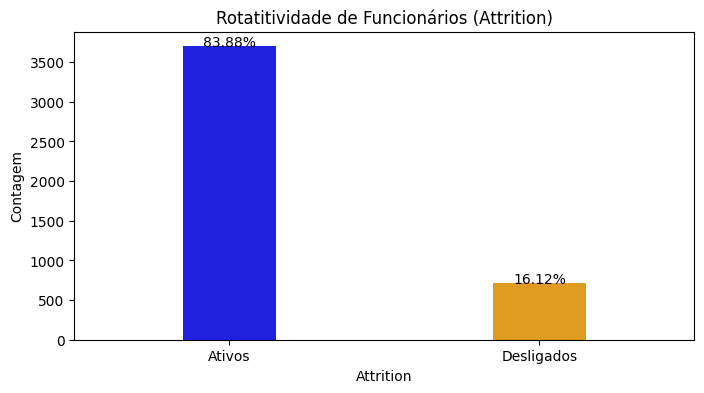

In [ ]:
# Gráfico de barras do percentual de pessoas que saíram da empresa
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Attrition', data=df, palette={'No': 'blue', 'Yes': 'orange'}, width=0.3)
plt.title('Rotatitividade de Funcionários (Attrition)')
plt.xlabel('Attrition')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Ativos', 'Desligados'])

# Adicionar percentuais no gráfico
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center")

plt.show()

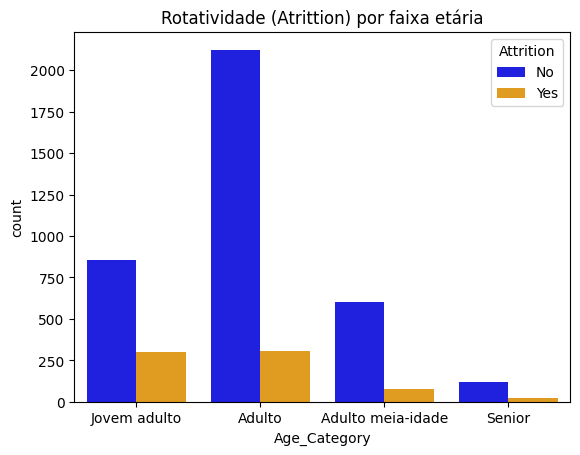

In [ ]:
order = ['Jovem adulto', 'Adulto', 'Adulto meia-idade', 'Senior']
sns.countplot(x='Age_Category', hue='Attrition', data=df, order=order, palette={'No': 'blue', 'Yes': 'orange'})

plt.title('Rotatividade (Atrittion) por faixa etária')
plt.show()

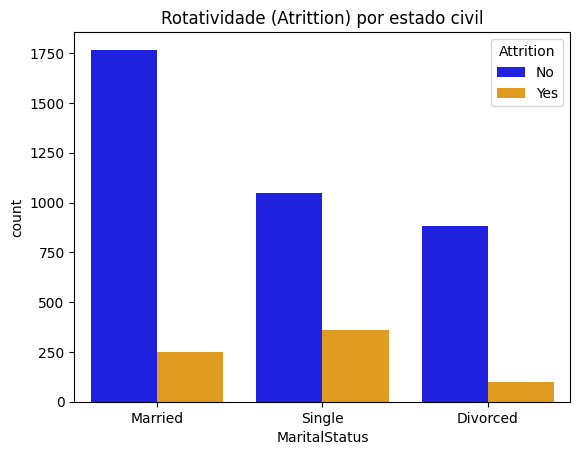

In [ ]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette={'No': 'blue', 'Yes': 'orange'})
plt.title('Rotatividade (Atrittion) por estado civil')
plt.show()

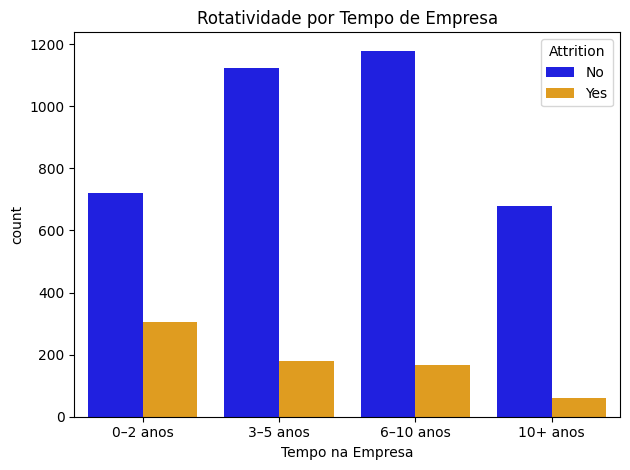

In [ ]:
# Criar faixas de tempo de empresa
df['TempoEmpresa_cat'] = pd.cut(df['YearsAtCompany'], bins=[-1, 2, 5, 10, 40],
                                     labels=['0–2 anos', '3–5 anos', '6–10 anos', '10+ anos'])

sns.countplot(x='TempoEmpresa_cat', hue='Attrition', data=df, palette={'No': 'blue', 'Yes': 'orange'})
plt.title('Rotatividade por Tempo de Empresa')
plt.xlabel('Tempo na Empresa')
plt.tight_layout()
plt.show()

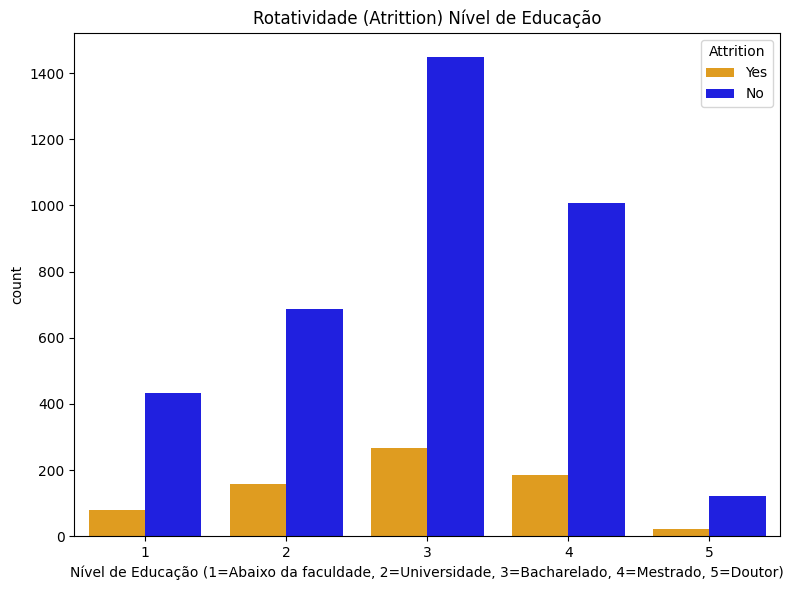

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Attrition', data=df, palette={'No': 'blue', 'Yes': 'orange'})
plt.title('Rotatividade (Atrittion) Nível de Educação')
plt.xlabel('Nível de Educação (1=Abaixo da faculdade, 2=Universidade, 3=Bacharelado, 4=Mestrado, 5=Doutor)')
plt.tight_layout()
plt.show()

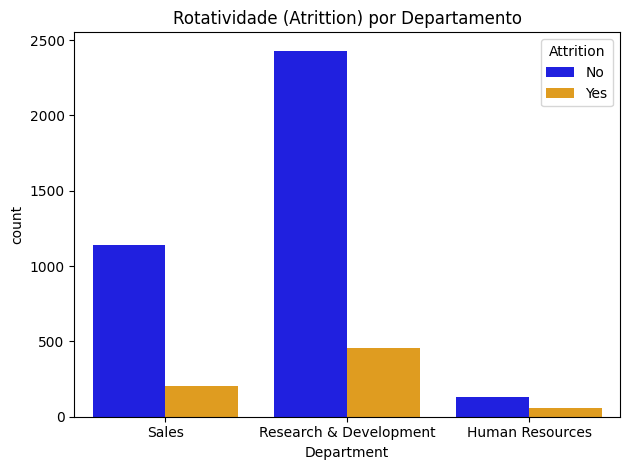

In [ ]:
sns.countplot(x='Department', hue='Attrition', data=df, palette={'No': 'blue', 'Yes': 'orange'})
plt.title('Rotatividade (Atrittion) por Departamento')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

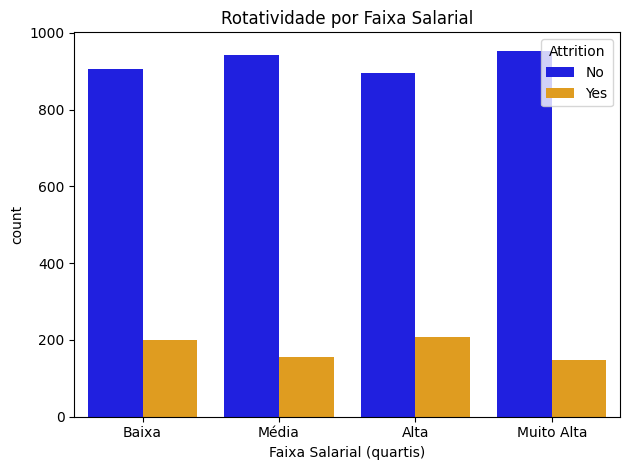

In [ ]:
# Criar faixas salariais
df['Faixa_Salarial'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Baixa', 'Média', 'Alta', 'Muito Alta'])

sns.countplot(x='Faixa_Salarial', hue='Attrition', data=df, palette={'No': 'blue', 'Yes': 'orange'})
plt.title('Rotatividade por Faixa Salarial')
plt.xlabel('Faixa Salarial (quartis)')
plt.tight_layout()
plt.show()

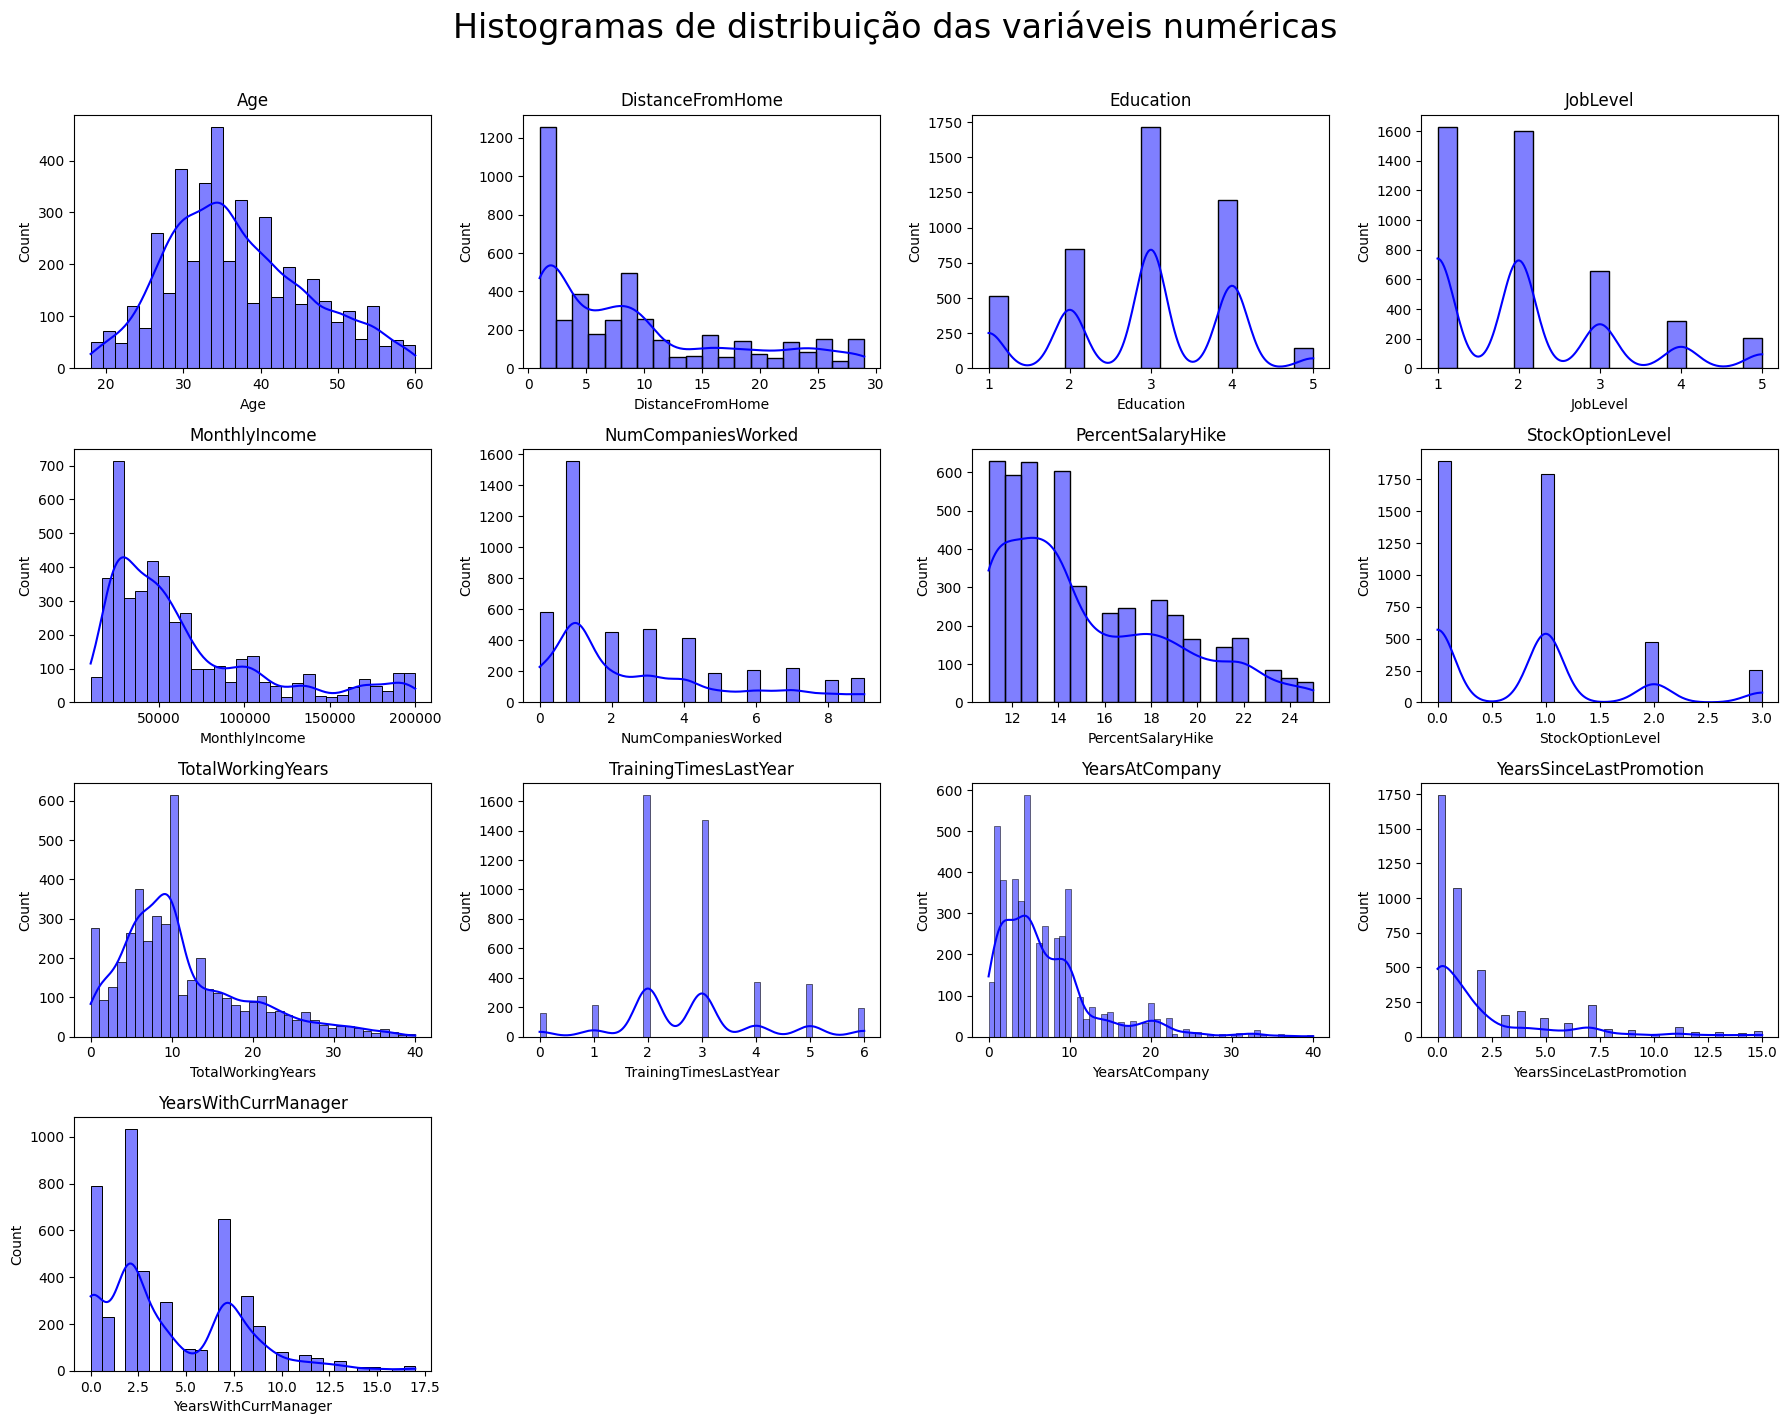

In [ ]:
# Seleciona apenas colunas numéricas
num_cols = df.select_dtypes(include=['int64']).columns.drop('EmployeeID')

# Define o tamanho da figura
plt.figure(figsize=(18, 18))
plt.suptitle('Histogramas de distribuição das variáveis numéricas', fontsize=24)

# Loop para criar os subplots dos histogramas
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(col, fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

## **Visão geral da EDA**

**Status Geral:**
* 83,9% Ativos
* 16,1% Desligados

**Faixa etária:**
* Jovens: maior proporção de desligamentos
* Adultos: maior concentração de ativos
* Média de idade: 37 anos (mín: 18, máx: 60)

**Estado civil:**
* Casados: maior proporção de ativos
* Solteiros: maior proporção de desligamentos
* Tempo de empresa:
  * Maior saída: 0–2 anos
  * +10 anos: minoria, baixa taxa de saída

**Educação:**
* Maioria dos ativos: Bacharelado (Education 3)
* Menor representatividade: Doutorado

**Setor:**
* Research & Development: maior número de ativos
* RH: alta rotatividade
* Sales: alta proporção de desligamentos

**Nível Salarial:**
* Equilíbrio entre entradas e saídas em todas as faixas

# Feature Engineering

Verificação de quais as variáveis existentes para entender quais serão excluídas no modelo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   int64   
 1   Attrition                4410 non-null   object  
 2   BusinessTravel           4410 non-null   object  
 3   Department               4410 non-null   object  
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   object  
 7   EmployeeID               4410 non-null   int64   
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   object  
 10  MaritalStatus            4410 non-null   object  
 11  MonthlyIncome            4410 non-null   int64   
 12  NumCompaniesWorked       4410 non-null   int64   
 13  PercentSalaryHike        4410 non-null   int64   
 14  StockOpt

Exclusão das variáveis que não serão utilizadas no modelo

In [ ]:
# Excluindo colunas que não serão utilizadas no modelo
cols_to_drop = [
    'EducationField', # Mesma ideia de JobRole - evitando duplicidade
    'EmployeeID', # Não tem utilidade no modelo por ser um identificador
    'MaritalStatus', # Pode ser considerada descriminatória de acordo com o modelo
    'Age_Category', # Variável descritiva sobre a Age
    'TempoEmpresa_cat', # Variável descritiva sobre a YearsAtCompany
    'Faixa_Salarial', # Variável descritiva sobre MonthlyIncome
    ]
df_modelo = df.drop(columns=cols_to_drop, axis=1)

# Colunas já excluídas anteriormente: EmployeeCount, Over18, StandardHours, Gender

Verificando como ficou a base usada para o modelo

In [ ]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   Attrition                4410 non-null   object
 2   BusinessTravel           4410 non-null   object
 3   Department               4410 non-null   object
 4   DistanceFromHome         4410 non-null   int64 
 5   Education                4410 non-null   int64 
 6   JobLevel                 4410 non-null   int64 
 7   JobRole                  4410 non-null   object
 8   MonthlyIncome            4410 non-null   int64 
 9   NumCompaniesWorked       4410 non-null   int64 
 10  PercentSalaryHike        4410 non-null   int64 
 11  StockOptionLevel         4410 non-null   int64 
 12  TotalWorkingYears        4410 non-null   int64 
 13  TrainingTimesLastYear    4410 non-null   int64 
 14  YearsAtCompany           4410 non-null  

Separação das variáveis preditoras e alvo

In [ ]:
# Separando a variável-alvo antes de criar as dummies
df = df_modelo.drop(columns='Attrition') # variáveis preditoras
y = df_modelo['Attrition'] # variável alvo

X = df

Transformação one-hot encoding - Dummy

In [ ]:
# Convertendo variáveis categóricas em variáveis dummy (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

Divisão entre treino (train) e teste (test)

In [ ]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicação dos modelos

## Regressão Logística

Acurácia: 0.8367346938775511

Matriz de Confusão:
 [[737   3]
 [141   1]]

Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.84      1.00      0.91       740
         Yes       0.25      0.01      0.01       142

    accuracy                           0.84       882
   macro avg       0.54      0.50      0.46       882
weighted avg       0.74      0.84      0.77       882

AUC: 0.7012086029691663
Recall (classe positiva): 0.007042253521126761
F1-score (classe positiva): 0.0136986301369863


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


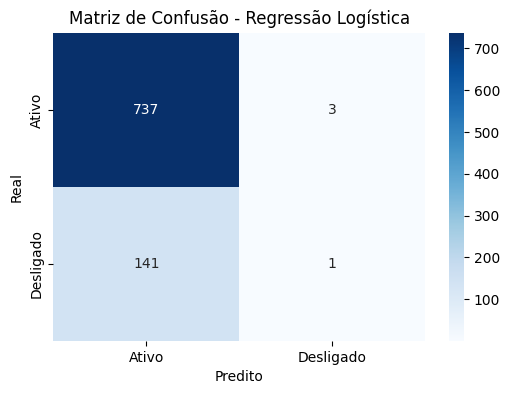

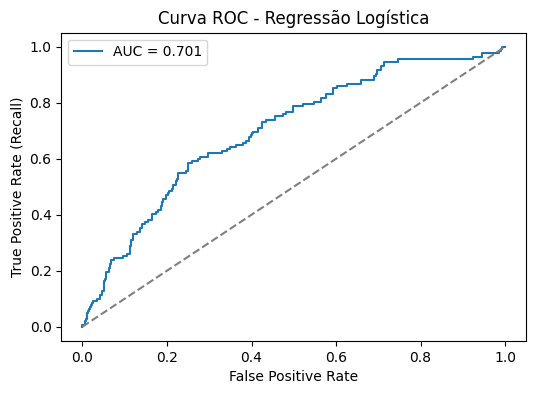

/tmp/ipython-input-1137625753.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef[:15], y=coef.index[:15], palette="viridis")


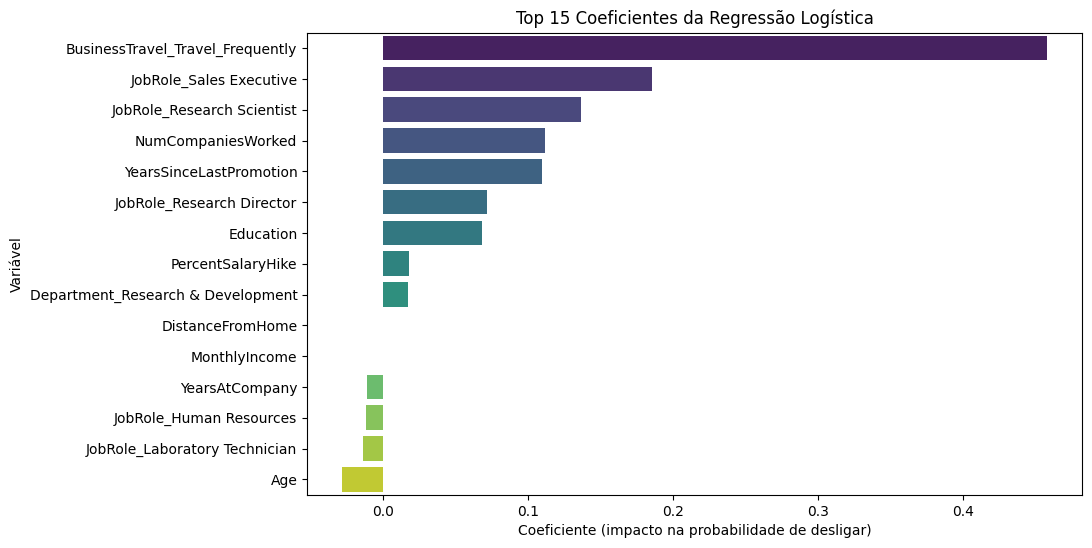

In [ ]:
# ------------------------------
# Regressão Logística
# ------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Treinar o modelo
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Previsões
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

# ------------------------------
# Avaliar o modelo
# ------------------------------
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_log))
print("AUC:", roc_auc_score((y_test=="Yes").astype(int), y_prob_log))
print("Recall (classe positiva):", recall_score((y_test=="Yes").astype(int), (y_pred_log=="Yes").astype(int)))
print("F1-score (classe positiva):", f1_score((y_test=="Yes").astype(int), (y_pred_log=="Yes").astype(int)))

# ------------------------------
# Gráfico 1: Matriz de Confusão
# ------------------------------
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ativo","Desligado"],
            yticklabels=["Ativo","Desligado"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

# ------------------------------
# Gráfico 2: Curva ROC
# ------------------------------
fpr, tpr, thresholds = roc_curve((y_test=="Yes").astype(int), y_prob_log)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score((y_test=='Yes').astype(int), y_prob_log):.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC - Regressão Logística")
plt.legend()
plt.show()

# ------------------------------
# Gráfico 3: Coeficientes das variáveis
# ------------------------------
coef = pd.Series(log_model.coef_[0], index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=coef[:15], y=coef.index[:15], palette="viridis")
plt.title("Top 15 Coeficientes da Regressão Logística")
plt.xlabel("Coeficiente (impacto na probabilidade de desligar)")
plt.ylabel("Variável")
plt.show()


## XGBoost

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:21:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.9795918367346939

Matriz de Confusão:
 [[740   0]
 [ 18 124]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       740
           1       1.00      0.87      0.93       142

    accuracy                           0.98       882
   macro avg       0.99      0.94      0.96       882
weighted avg       0.98      0.98      0.98       882

AUC: 0.9964693566806243
Recall (classe positiva): 0.8732394366197183
F1-score (classe positiva): 0.9323308270676691


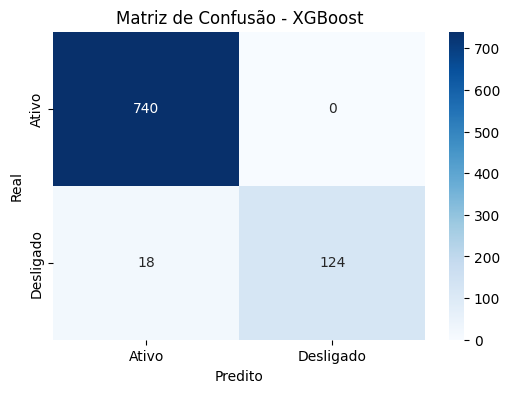

/tmp/ipython-input-1678681669.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15], palette="viridis")


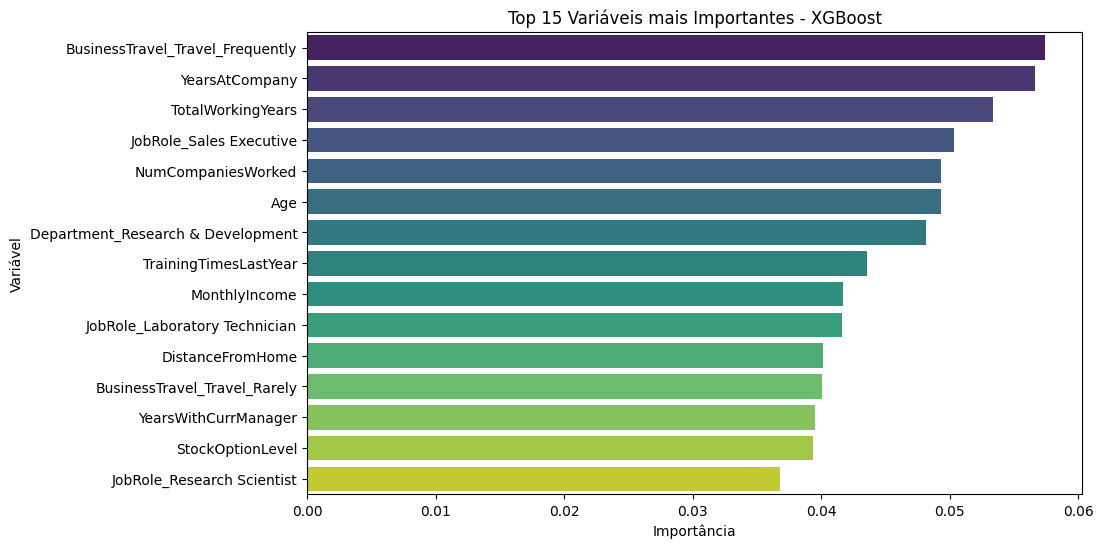

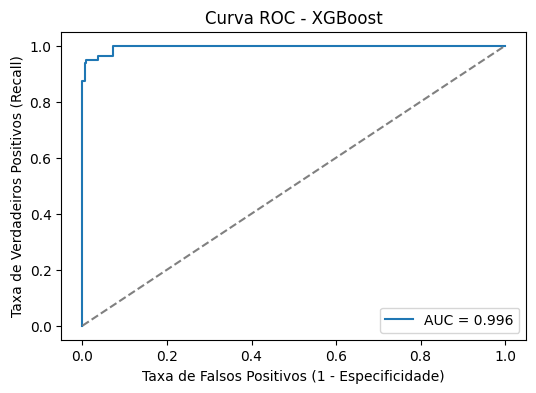

In [ ]:
# ------------------------------
# XGBoost - Modelo Completo
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, recall_score, f1_score
)
from sklearn.model_selection import train_test_split

# Convert target variable to binary
y_train_bin = y_train.apply(lambda x: 1 if x == 'Yes' else 0)
y_test_bin = y_test.apply(lambda x: 1 if x == 'Yes' else 0)

# ------------------------------
# Treinar o Modelo
# ------------------------------
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train_bin)

# ------------------------------
# Predições
# ------------------------------
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# ------------------------------
# Avaliação Numérica
# ------------------------------
print("Acurácia:", accuracy_score(y_test_bin, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test_bin, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test_bin, y_pred))
print("AUC:", roc_auc_score(y_test_bin, y_proba))
print("Recall (classe positiva):", recall_score(y_test_bin, y_pred, pos_label=1))
print("F1-score (classe positiva):", f1_score(y_test_bin, y_pred, pos_label=1))

# ------------------------------
# Gráfico 1: Matriz de Confusão
# ------------------------------
cm = confusion_matrix(y_test_bin, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ativo","Desligado"],
            yticklabels=["Ativo","Desligado"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - XGBoost")
plt.show()

# ------------------------------
# Gráfico 2: Importância das Variáveis
# ------------------------------
importances = xgb_model.feature_importances_
features = X_train.columns
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15], palette="viridis")
plt.title("Top 15 Variáveis mais Importantes - XGBoost")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()

# ------------------------------
# Gráfico 3: Curva ROC
# ------------------------------
fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_bin, y_proba):.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (1 - Especificidade)")
plt.ylabel("Taxa de Verdadeiros Positivos (Recall)")
plt.title("Curva ROC - XGBoost")
plt.legend()
plt.show()

Aplicando cross-validation para confirmar se o modelo realmente está generalizando bem ou se só “decorou” a divisão do train/test

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
import numpy as np

# Convert y to binary (0/1)
y_bin = y.map({'Yes': 1, 'No': 0})

# Definição do modelo
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Definição do cross-validation estratificado (garante proporção da classe)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar com acurácia
scores_accuracy = cross_val_score(xgb_model, X, y_bin, cv=cv, scoring='accuracy')

# Avaliar com AUC-ROC
scores_auc = cross_val_score(xgb_model, X, y_bin, cv=cv, scoring='roc_auc')

print("Resultados Cross-Validation:")
print(f"Acurácias: {scores_accuracy}")
print(f"Média da Acurácia: {np.mean(scores_accuracy):.4f} ± {np.std(scores_accuracy):.4f}")

print(f"AUC-ROC: {scores_auc}")
print(f"Média da AUC-ROC: {np.mean(scores_auc):.4f} ± {np.std(scores_auc):.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:21:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:21:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:21:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:21:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:21:32] WARNING: /w

Resultados Cross-Validation:
Acurácias: [0.98866213 0.99659864 0.99206349 0.99659864 0.98639456]
Média da Acurácia: 0.9921 ± 0.0041
AUC-ROC: [0.98920822 0.99991435 0.99642177 1.         0.98393217]
Média da AUC-ROC: 0.9939 ± 0.0063


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:21:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Random Forest

Acurácia: 0.9954648526077098

Matriz de Confusão:
 [[740   0]
 [  4 138]]

Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.99      1.00      1.00       740
         Yes       1.00      0.97      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

AUC: 0.999771602588504
Recall (classe positiva): 0.971830985915493
F1-score (classe positiva): 0.9857142857142858


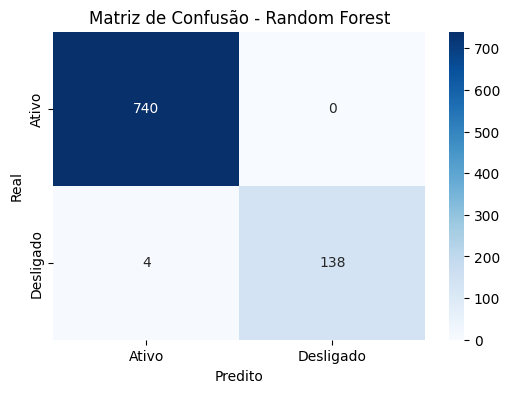

/tmp/ipython-input-1655480938.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15], palette="viridis")


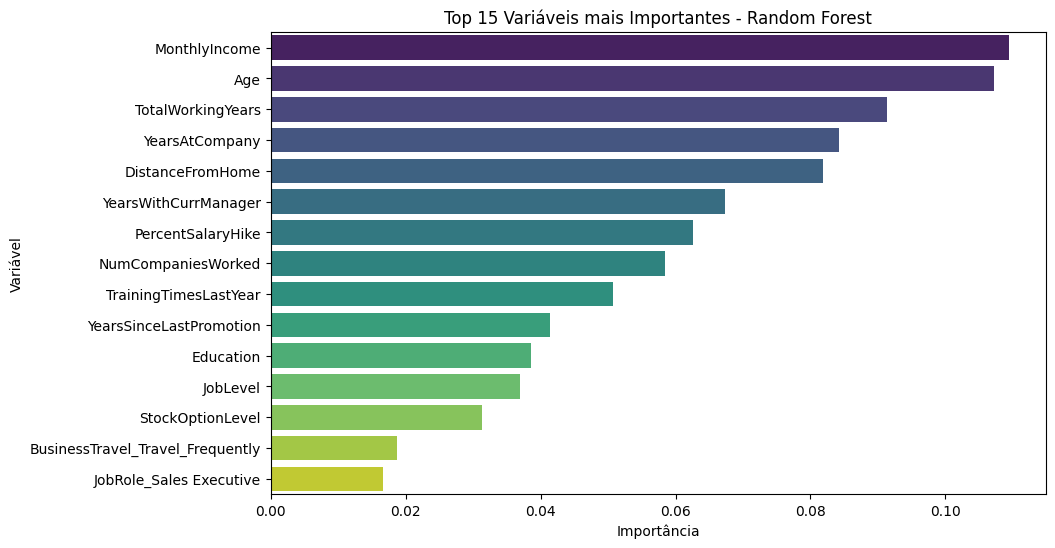

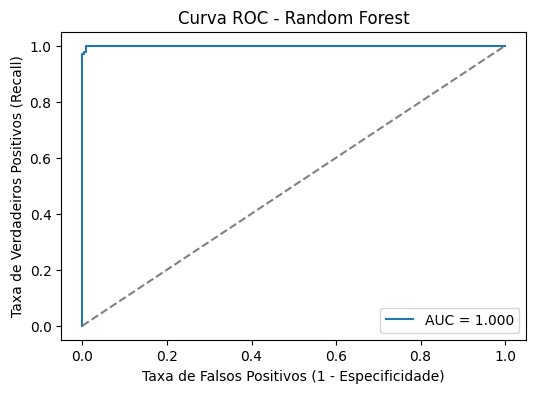

In [ ]:
# ------------------------------
# Random Forest - Modelo Completo
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, recall_score, f1_score
)

# ------------------------------
# Treinar o Modelo
# ------------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,        # número de árvores
    max_depth=None,          # deixa a profundidade crescer
    random_state=42,
    class_weight="balanced"  # ajuda se tiver desbalanceamento
)

rf_model.fit(X_train, y_train)

# ------------------------------
# Predições
# ------------------------------
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # probabilidade classe positiva

# ------------------------------
# Avaliação Numérica
# ------------------------------
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("Recall (classe positiva):", recall_score(y_test, y_pred, pos_label='Yes'))
print("F1-score (classe positiva):", f1_score(y_test, y_pred, pos_label='Yes'))

# ------------------------------
# Gráfico 1: Matriz de Confusão
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ativo","Desligado"],
            yticklabels=["Ativo","Desligado"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# ------------------------------
# Gráfico 2: Importância das Variáveis
# ------------------------------
importances = rf_model.feature_importances_
features = X_train.columns
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15], palette="viridis")
plt.title("Top 15 Variáveis mais Importantes - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()

# ------------------------------
# Gráfico 3: Curva ROC
# ------------------------------
# Convert y_test to binary for roc_curve
y_test_bin = y_test.map({'Yes': 1, 'No': 0})
fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_bin, y_proba):.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (1 - Especificidade)")
plt.ylabel("Taxa de Verdadeiros Positivos (Recall)")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

# Comparação dos modelos

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:21:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                Modelo  Acurácia    Recall        F1       AUC
0  Regressão Logística  0.836735  0.007042  0.013699  0.701209
1              XGBoost  0.979592  0.873239  0.932331  0.996469
2        Random Forest  0.995465  0.971831  0.985714  0.999772


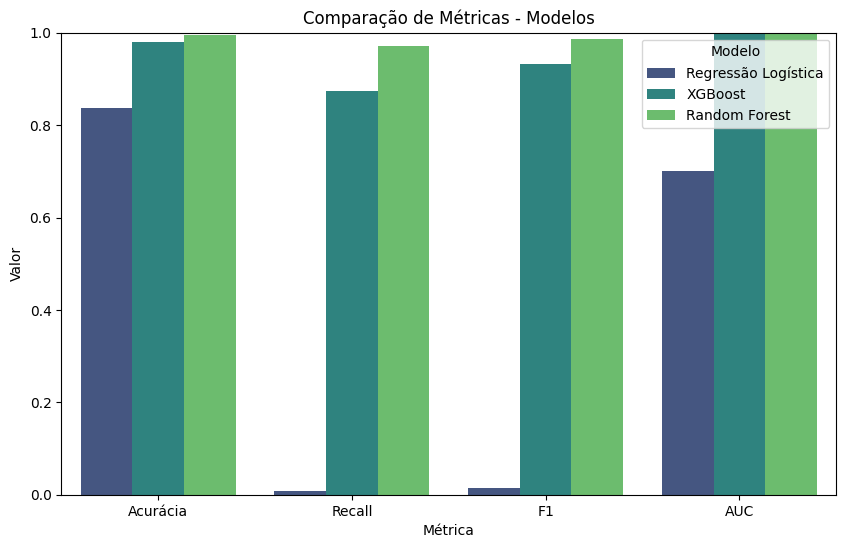

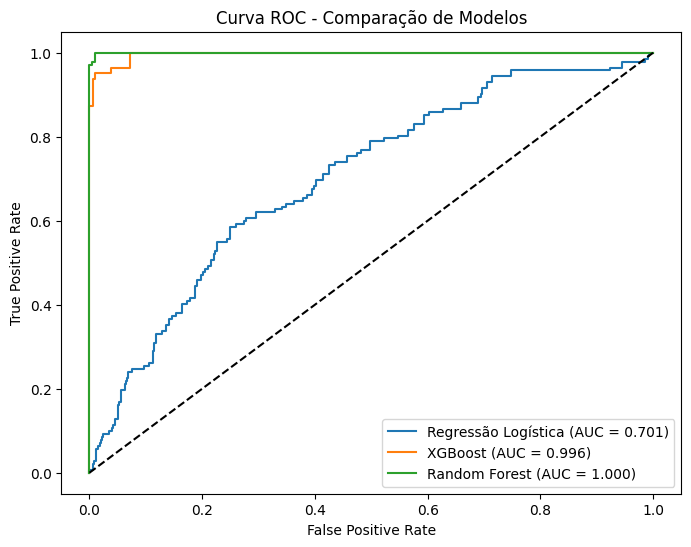

/tmp/ipython-input-2738810476.py:98: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_prob[y_test_bin==1], label=f"{nome} - Classe Yes", shade=True)
/tmp/ipython-input-2738810476.py:99: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_prob[y_test_bin==0], label=f"{nome} - Classe No", shade=False, linestyle='--')
/tmp/ipython-input-2738810476.py:98: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_prob[y_test_bin==1], label=f"{nome} - Classe Yes", shade=True)
/tmp/ipython-input-2738810476.py:99: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0;

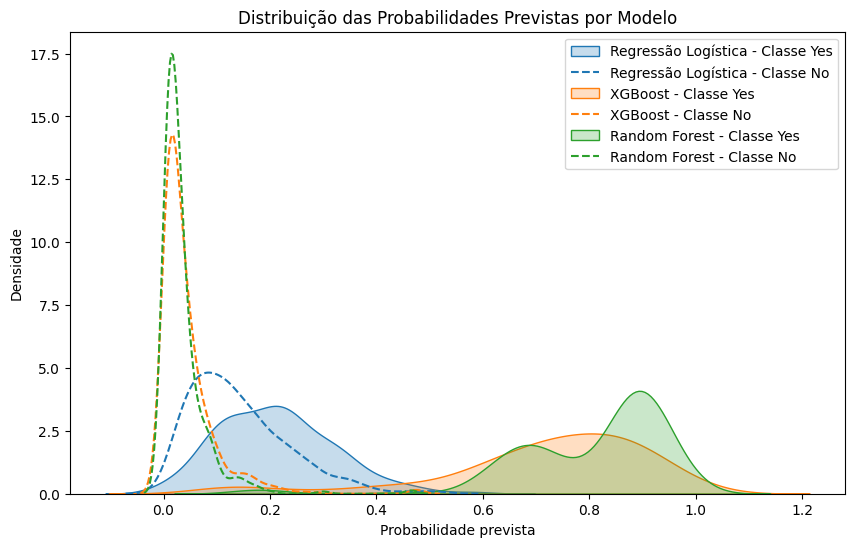

/tmp/ipython-input-2738810476.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_xgb[:15], y=importances_xgb.index[:15], palette="viridis", ax=axes[0])
/tmp/ipython-input-2738810476.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf[:15], y=importances_rf.index[:15], palette="magma", ax=axes[1])


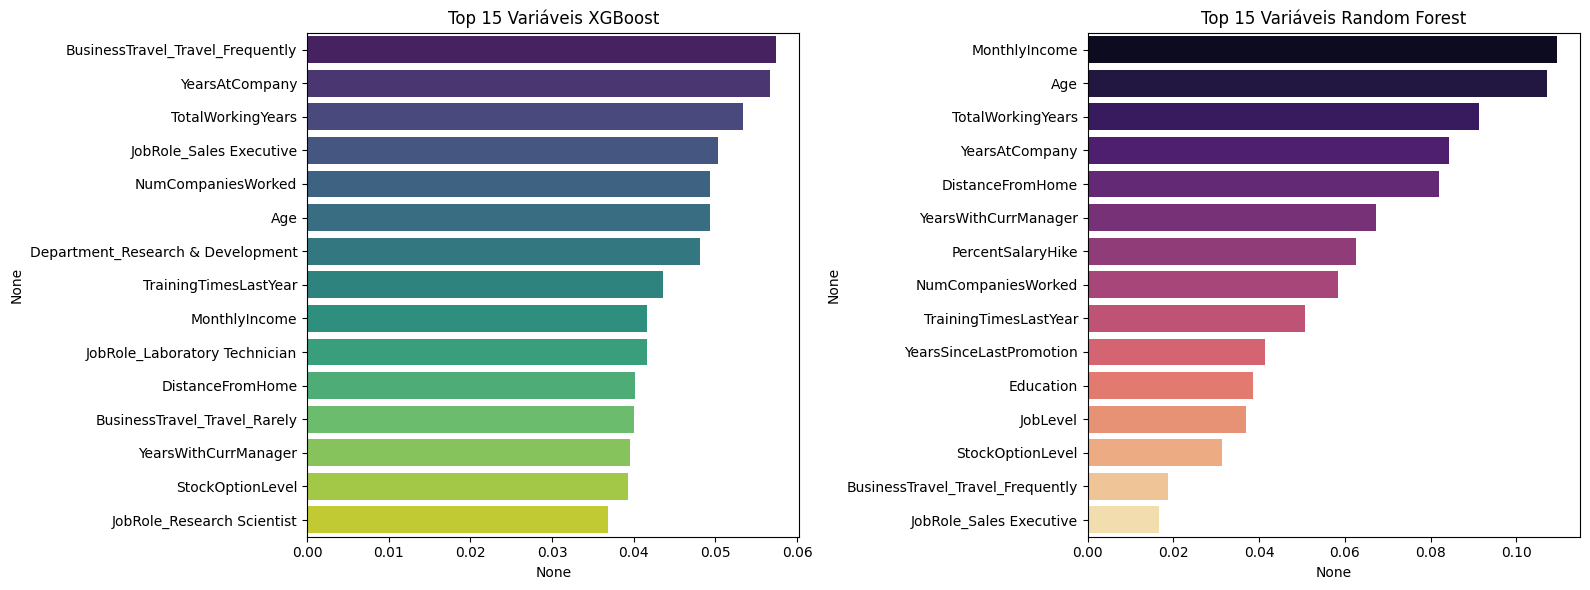

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Convertendo y para binário
y_train_bin = np.where(y_train == 'Yes', 1, 0)
y_test_bin = np.where(y_test == 'Yes', 1, 0)

# Modelos
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train_bin)

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train_bin)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)
rf_model.fit(X_train, y_train_bin)

# Função para métricas
def obter_metricas(modelo, X_test, y_test_bin, nome_modelo):
    y_pred = modelo.predict(X_test)
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:,1]
    else:
        y_prob = y_pred

    return {
        "Modelo": nome_modelo,
        "Acurácia": accuracy_score(y_test_bin, y_pred),
        "Recall": recall_score(y_test_bin, y_pred),
        "F1": f1_score(y_test_bin, y_pred),
        "AUC": roc_auc_score(y_test_bin, y_prob)
    }

# Calculando métricas
metricas_lr = obter_metricas(log_model, X_test, y_test_bin, "Regressão Logística")
metricas_xgb = obter_metricas(xgb_model, X_test, y_test_bin, "XGBoost")
metricas_rf = obter_metricas(rf_model, X_test, y_test_bin, "Random Forest")

df_metricas = pd.DataFrame([metricas_lr, metricas_xgb, metricas_rf])
print(df_metricas)

# ------------------------------
# Gráfico 1: Comparação de Métricas
# ------------------------------
df_melt = df_metricas.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')
plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Métrica', y='Valor', hue='Modelo', palette='viridis')
plt.title("Comparação de Métricas - Modelos")
plt.ylim(0,1)
plt.show()

# ------------------------------
# Gráfico 2: Curvas ROC
# ------------------------------
plt.figure(figsize=(8,6))
for modelo, nome in zip([log_model, xgb_model, rf_model], ["Regressão Logística", "XGBoost", "Random Forest"]):
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:,1]
    else:
        y_prob = modelo.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
    auc_score = roc_auc_score(y_test_bin, y_prob)
    plt.plot(fpr, tpr, label=f"{nome} (AUC = {auc_score:.3f})")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Comparação de Modelos")
plt.legend()
plt.show()

# ------------------------------
# Gráfico 3: Distribuição das probabilidades previstas
# ------------------------------
plt.figure(figsize=(10,6))
for modelo, nome in zip([log_model, xgb_model, rf_model], ["Regressão Logística", "XGBoost", "Random Forest"]):
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:,1]
    else:
        y_prob = modelo.predict(X_test)
    sns.kdeplot(y_prob[y_test_bin==1], label=f"{nome} - Classe Yes", shade=True)
    sns.kdeplot(y_prob[y_test_bin==0], label=f"{nome} - Classe No", shade=False, linestyle='--')
plt.title("Distribuição das Probabilidades Previstas por Modelo")
plt.xlabel("Probabilidade prevista")
plt.ylabel("Densidade")
plt.legend()
plt.show()

# ------------------------------
# Gráfico 4: Importância de variáveis XGBoost vs Random Forest
# ------------------------------
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.barplot(x=importances_xgb[:15], y=importances_xgb.index[:15], palette="viridis", ax=axes[0])
axes[0].set_title("Top 15 Variáveis XGBoost")
sns.barplot(x=importances_rf[:15], y=importances_rf.index[:15], palette="magma", ax=axes[1])
axes[1].set_title("Top 15 Variáveis Random Forest")
plt.tight_layout()
plt.show()


In [ ]:
import pickle

# Salvar o modelo treinado
with open("modelo_rf.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Salvar as colunas do X_train
with open("model_columns.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)

print("Modelo e colunas salvos com sucesso!")


Modelo e colunas salvos com sucesso!
